In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy import sparse

%matplotlib inline

# Лабораторная работа 3 #

## Методы решения нелинейных уравнений и СНАУ ##

### Решаемое нелинейное уравнение ###
**е)** $x^2 - 20\sin{x} = 0$

### Решаемая система нелинейных уравнений ###
**б)** $\begin{align}
    \begin{cases}
        \tan{(xy + 0.4)} = x^2 \\
        0.6 x^2 + 2y^2 = 1 \\
    \end{cases}
\end{align}$

## Решение нелинейного уравнения ##

### Метод простой итерации ###

Из уравнения следует, что $|x| \leq 2\sqrt{5} \approx 4.47$. При этом $20\sin{\left(-\frac{3\pi}{2}\right)} < 22.2 < \left(\frac{3\pi}{2}\right)^2$ $\Rightarrow$ $|x| \geq 0$.

Заметим, что $x = 0$ – корень уравнения. Второй корень лежит в диапазоне $x \in [2.5, 3]$. Зная это, построим МПИ.

$ x^2 - 20\sin{x} = 0 \Leftrightarrow x_{n+1} = f(x_n) = \pi - \arcsin{\frac{x_n^2}{20}}$

$|f'(x_n)| = \frac{2x}{\sqrt{400 - x^4}} \in [0.25, 0.31]$, $x \in [2.5, 3]$. Значит, МПИ сходится.

In [4]:
def f(x):
    return np.pi - np.arcsin(x**2 / 20)

class Fixed_Point_Iteration_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n
            
    def __call__(self, x_0):
        x = x_0
        for i in range(self.n):
            x = self.f(x)

        return x

def f1(x):
    return np.arcsin(x**2 / 20)

x_0 = 2.7 => root: 2.7529466338171606
x_0 = 3 => root: 2.7529466338263275


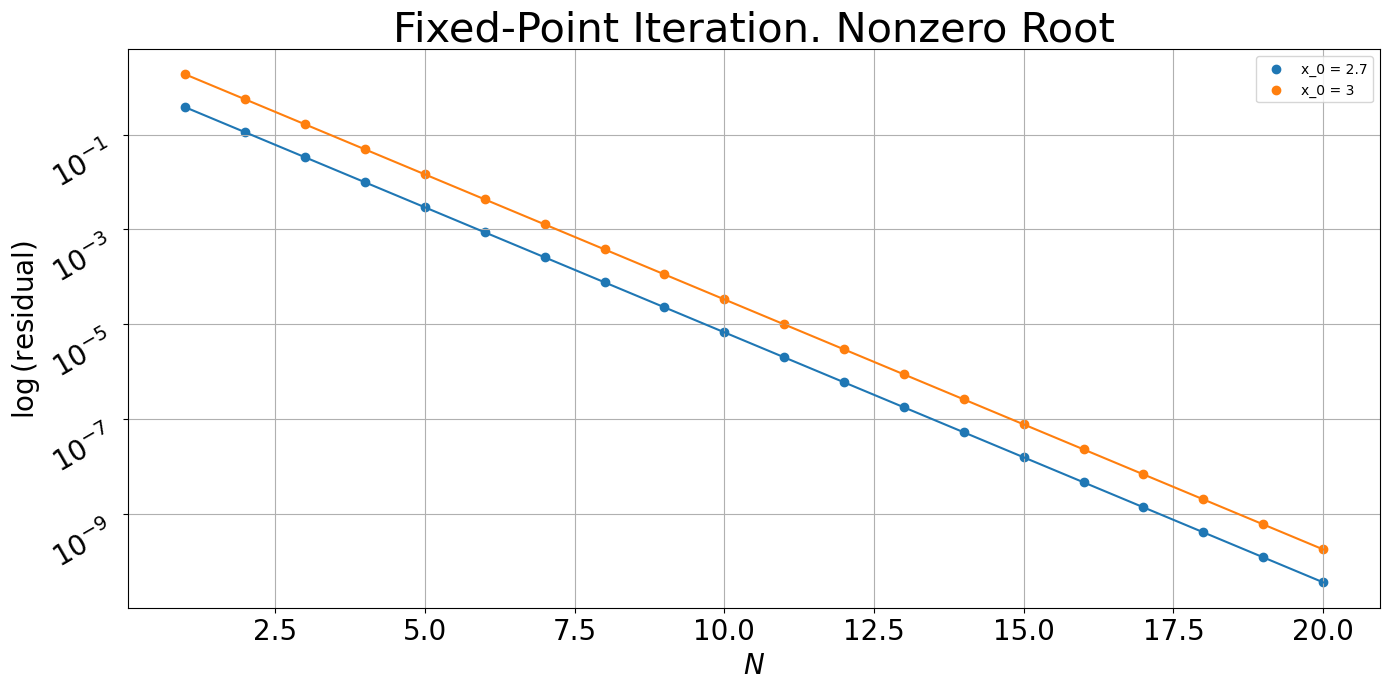

In [5]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Nonzero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f, i)
    root = fpie(2.7)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 2.7")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

print(f"x_0 = 2.7 => root: {root}")

residuals.clear()

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f, i)
    root = fpie(3)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 3")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 3 => root: {root}")

Аналогично, применим МПИ $x_{n+1} = f(x_n) = \arcsin{\frac{x_n^2}{20}}$ для отыскания корня $x = 0$.

$|f'(x_n)| = \frac{2x}{\sqrt{400 - x^4}} \in [0, 0.051]$, $x \in [-0.5, 0.5]$. Значит, МПИ сходится.

x_0 = 0.5 => root: 1.0846540435014123e-50
x_0 = 0.1 => root: 4.656615977487321e-73


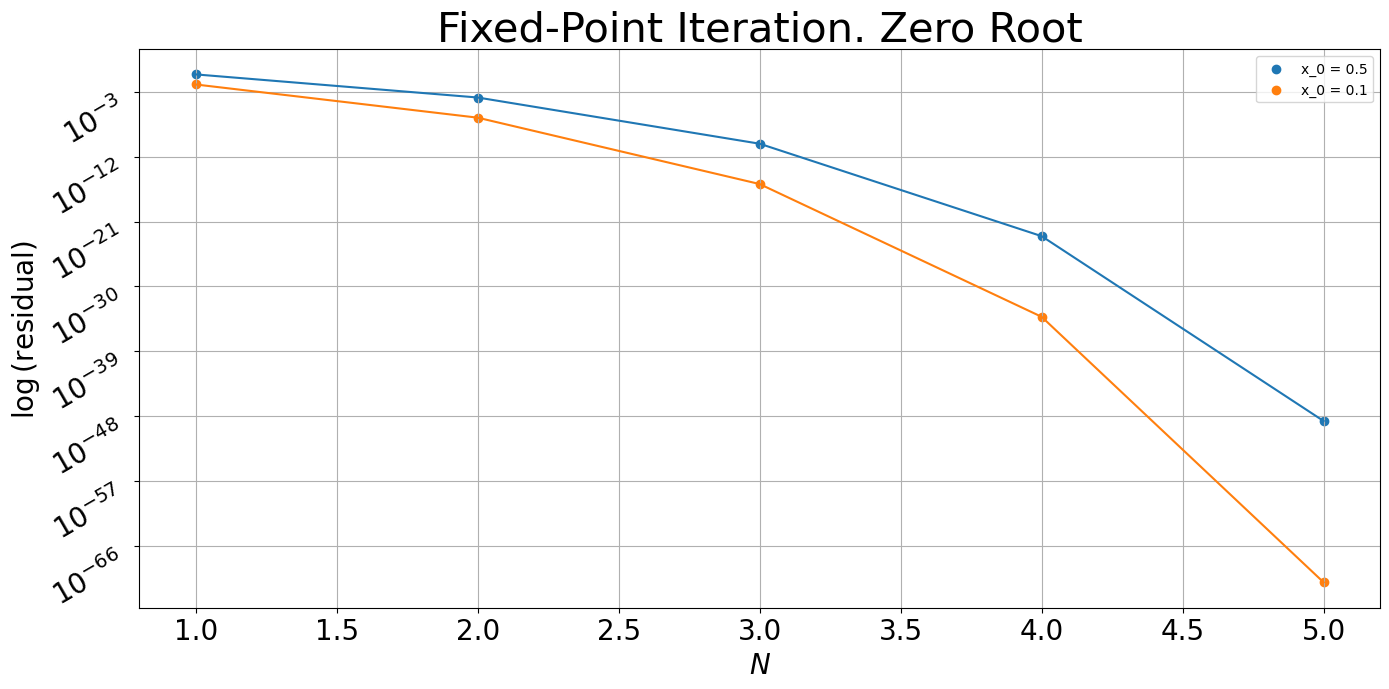

In [7]:
residuals = []
iterations = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Zero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f1, i)
    root = fpie(0.5)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.5")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.5 => root: {root}")

for i in range(1, iterations.size + 1):
    fpie = Fixed_Point_Iteration_Equation(f1, i)
    root = fpie(0.1)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.1")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.1 => root: {root}")

### Метод Ньютона ###

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

In [10]:
def num_deriv(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def g(x):
    return x**2 - 20 * np.sin(x)

class Newton_Equation:
    def __init__(self, f, n):
        self.f = f
        self.n = n
            
    def __call__(self, x_0):
        x = x_0
        for i in range(self.n):
            x = x - (self.f(x) / num_deriv(self.f, x, 1e-3))

        return x

x_0 = 3 => root: 2.7529466338187047
x_0 = 2.8 => root: 2.7529466338187047


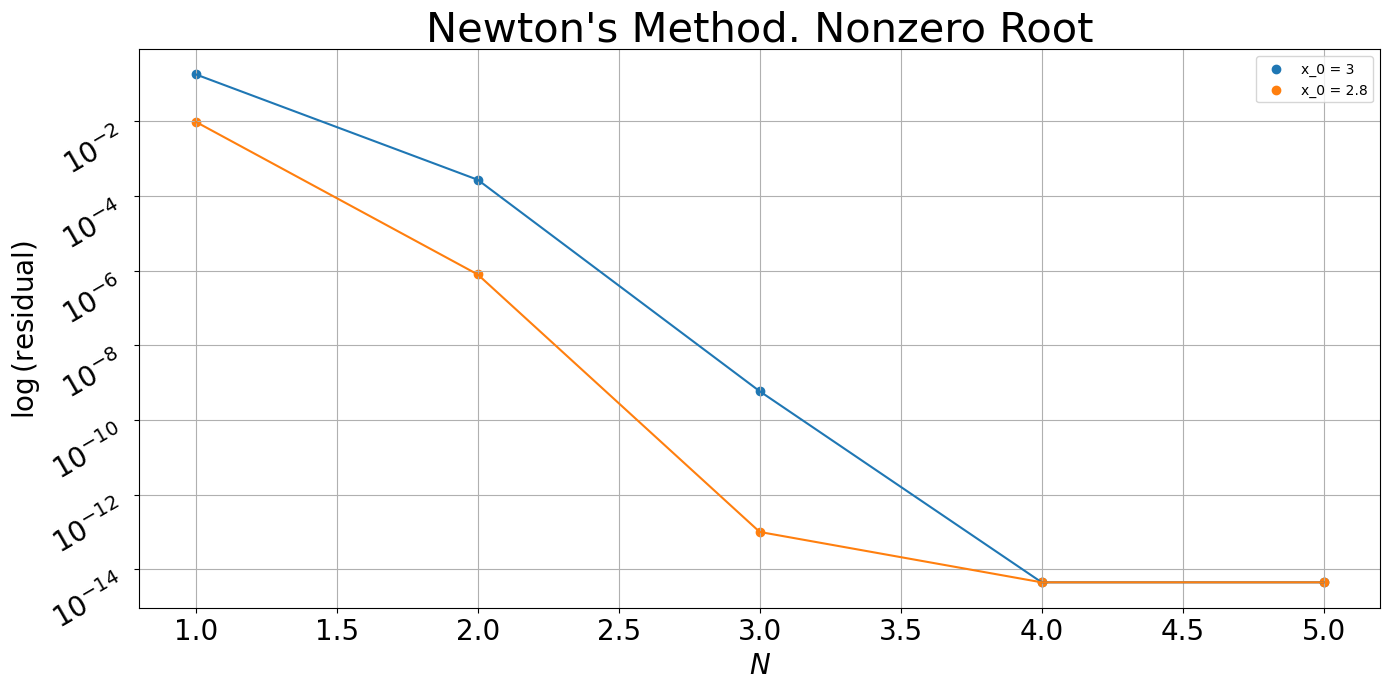

In [11]:
residuals = []
iterations = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Nonzero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(3)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 3")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 3 => root: {root}")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(2.8)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 2.8")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 2.8 => root: {root}")

Аналогично, применим метод Ньютона для отыскания корня $x = 0$.

x_0 = 0.5 => root: -1.8581101203682818e-23
x_0 = 0.1 => root: 1.6221542085612976e-28


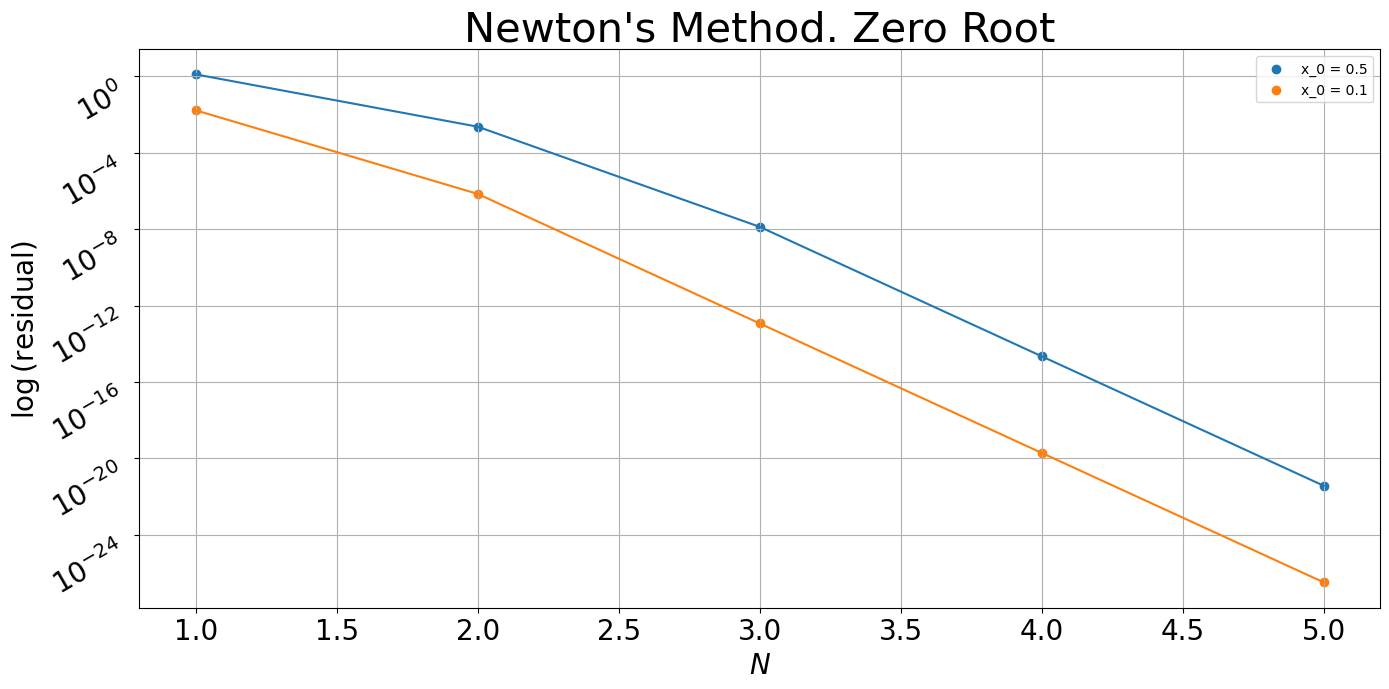

In [13]:
residuals = []
iterations = np.arange(1, 6)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Zero Root", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(0.5)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.5")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.5 => root: {root}")

for i in range(1, iterations.size + 1):
    newton = Newton_Equation(g, i)
    root = newton(0.1)
    residuals.append(np.abs(root**2 - 20 * np.sin(root)))

plt.scatter(iterations, residuals, label="x_0 = 0.1")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.1 => root: {root}")

## Решение нелинейной системы ##

### Метод простой итерации ###

$\begin{align}
    \begin{cases}
        x_{n+1} = \pm\sqrt{\frac{1-2y_{n}^2}{0.6}} \\
        y_{n+1} = \frac{1}{x_n}(\arctan({x_n^2}) - 0.4) \\
    \end{cases}
\end{align}$

- $|\frac{\partial \varphi_1}{\partial x}| \equiv 0$
- $|\frac{\partial \varphi_1}{\partial y}| = \frac{10|y_n|}{3}\sqrt{\frac{0.6}{1-2y_{n}^2}}$
- $|\frac{\partial \varphi_2}{\partial x}| = \left|\frac{2}{1+x_n^4} - \frac{1}{x_n^2}(\arctan((x^2_n) - 0.4))\right|$
- $|\frac{\partial \varphi_2}{\partial y}| \equiv 0$

Данная система имеет 4 попарно симметричных корня, поэтому проверим условия только для одного корня каждой пары.

- $x \in [-0.4, -0.35]$, $y \in [0.65, 0.7]$
- $x \in [1.0, 1.5]$, $y \in [0.4, 0.45]$

Подставив точки из диапазонов, увидим, что $\max{\left(|\frac{\partial \varphi_1}{\partial y}|, |\frac{\partial \varphi_2}{\partial x}|\right)} > 1$ для обоих диапазонов. Это значит, что МПИ не сойдётся гарантированно к какому-либо корню. Однако попробуем воспользоваться им для решения системы.

In [15]:
def f_x_1(y):
    return np.sqrt((1 - 2 * y**2) / 0.6)

def f_x_2(y):
    return -np.sqrt((1 - 2 * y**2) / 0.6)

def f_y(x):
    return (np.arctan(x**2) - 0.4) / x

class Fixed_Point_Iteration_System:
    def __init__(self, f_x, f_y, n):
        self.f_x = f_x
        self.f_y = f_y
        self.n = n
            
    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0
        for i in range(self.n):
            x = self.f_x(y)
            y = self.f_y(x)

        return x, y

x_0 = 1, y_0 = 0.4 => root_x: 1.048391758359379, root_y: 0.41261798319847065
x_0 = 0.4, y_0 = -0.65 => root_x: 1.0484873869352374, root_y: 0.4126669543660529


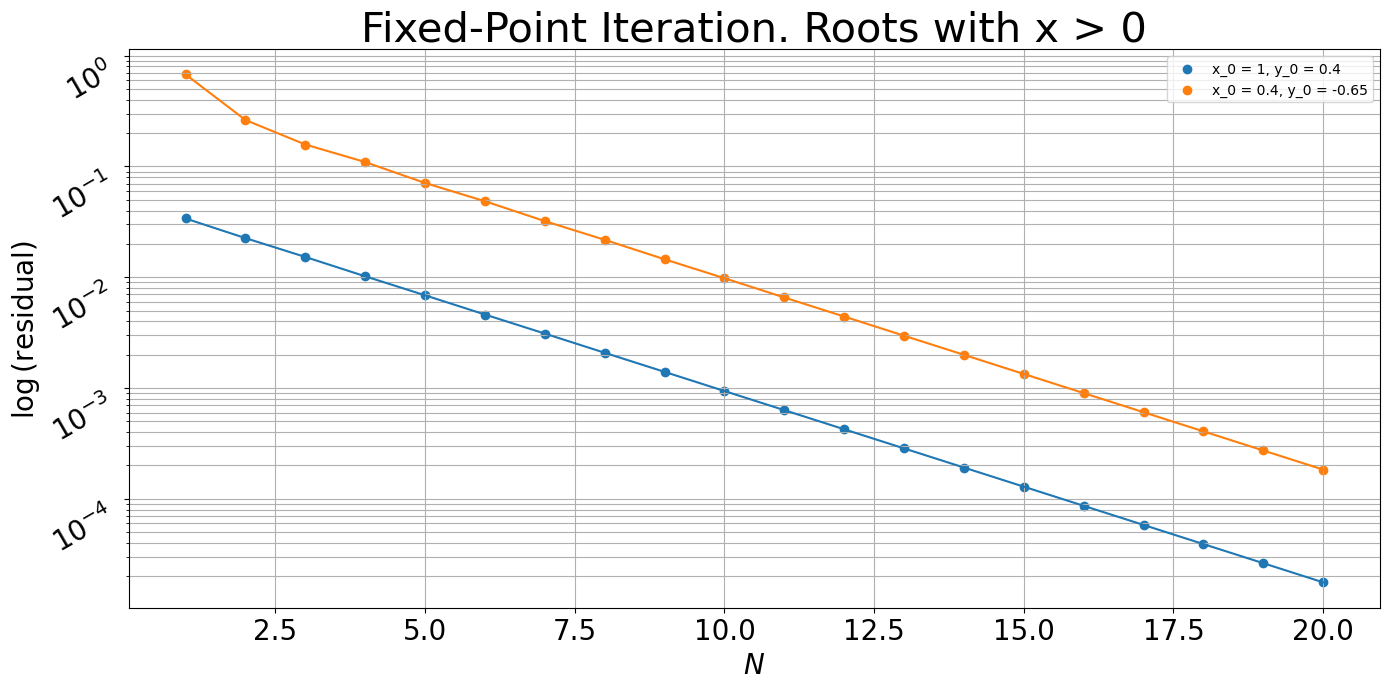

In [16]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Roots with x > 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_1, f_y, i)
    root_x, root_y = fpis(1, 0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 1, y_0 = 0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 1, y_0 = 0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_1, f_y, i)
    root_x, root_y = fpis(0.4, -0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 0.4, y_0 = -0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.4, y_0 = -0.65 => root_x: {root_x}, root_y: {root_y}")

Как видно из результатов, МПИ находит корень, но только один, лежащий в 1 квадранте.

Посмотрим, как программа находит симметричные корни.

x_0 = -1, y_0 = -0.4 => root_x: -1.048391758359379, root_y: -0.41261798319847065
x_0 = -0.4, y_0 = 0.65 => root_x: -1.0484873869352374, root_y: -0.4126669543660529


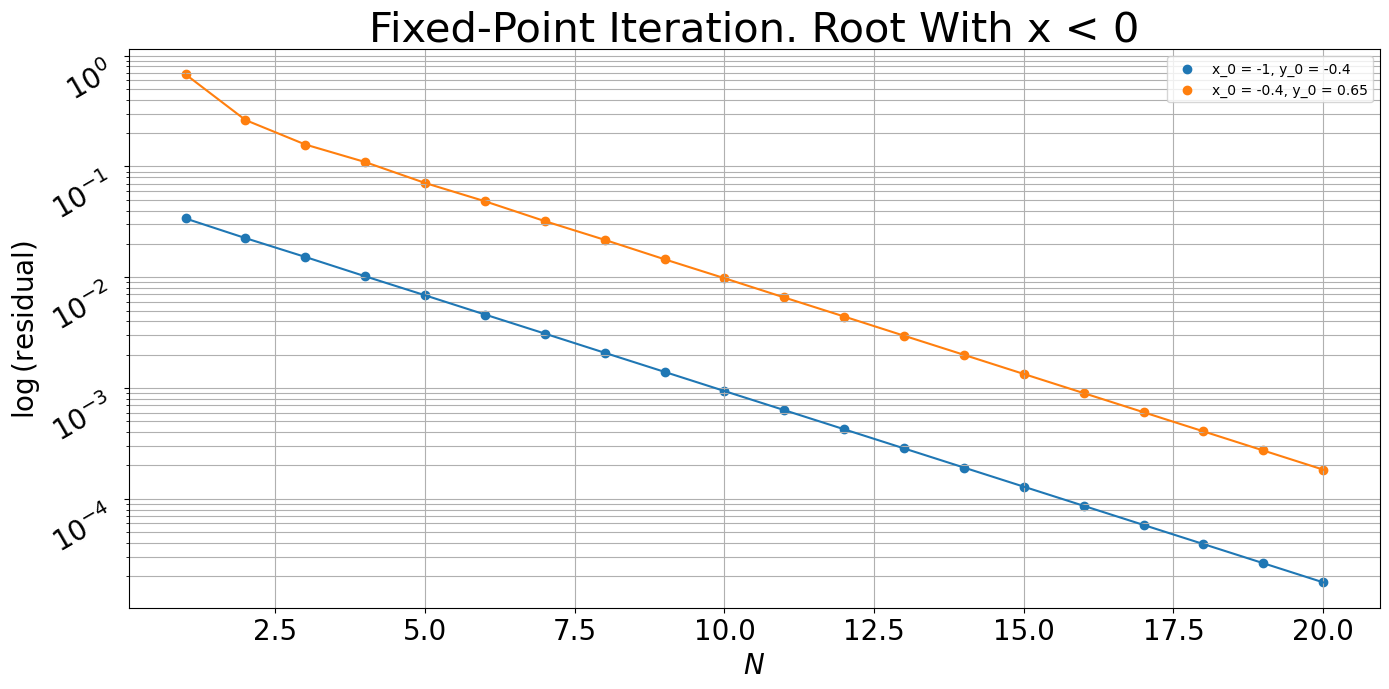

In [18]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Fixed-Point Iteration. Root With x < 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_2, f_y, i)
    root_x, root_y = fpis(-1, -0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -1, y_0 = -0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -1, y_0 = -0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    fpis = Fixed_Point_Iteration_System(f_x_2, f_y, i)
    root_x, root_y = fpis(-0.4, 0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -0.4, y_0 = 0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -0.4, y_0 = 0.65 => root_x: {root_x}, root_y: {root_y}")

Как и ожидалось, был найден только корень, симметричный найденному ранее, то есть лежащий в 3 квадранте.

### Метод Ньютона

$\bar x_{n+1} = \bar x_n - J^{-1} \cdot \bar f(x_n)$

Здесь:

$J = \begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_2}{\partial x} \\
\frac{\partial f_1}{\partial y} & \frac{\partial f_2}{\partial y}
\end{pmatrix}$

In [112]:
def f_xy_1(x, y):
    return np.tan(x*y + 0.4) - x**2

def f_xy_2(x, y):
    return 0.6 * x**2 + 2 * y**2 - 1

def num_deriv_x(f, x, y, h):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def num_deriv_y(f, x, y, h):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

class Newton_System:
    def __init__(self, f_x, f_y, n):
        self.f_xy_1 = f_xy_1
        self.f_xy_2 = f_xy_2
        self.n = n
            
    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0
        J = np.zeros((2, 2))
        J[0, 0] = num_deriv_x(self.f_xy_1, x, y, 1e-6)
        J[0, 1] = num_deriv_y(self.f_xy_1, x, y, 1e-6)
        J[1, 0] = num_deriv_x(self.f_xy_2, x, y, 1e-6)
        J[1, 1] = num_deriv_y(self.f_xy_2, x, y, 1e-6)
        J = np.linalg.inv(J)
        for i in range(self.n):
            step = (J @ np.array([self.f_xy_1(x, y), self.f_xy_2(x, y)])).tolist()
            x -= step[0]
            y -= step[1]

        return x, y

x_0 = 1, y_0 = 0.4 => root_x: 1.0484001411026231, root_y: 0.4126222767141881
x_0 = 0.4, y_0 = -0.65 => root_x: 0.37984844431748094, root_y: -0.6758065905308093


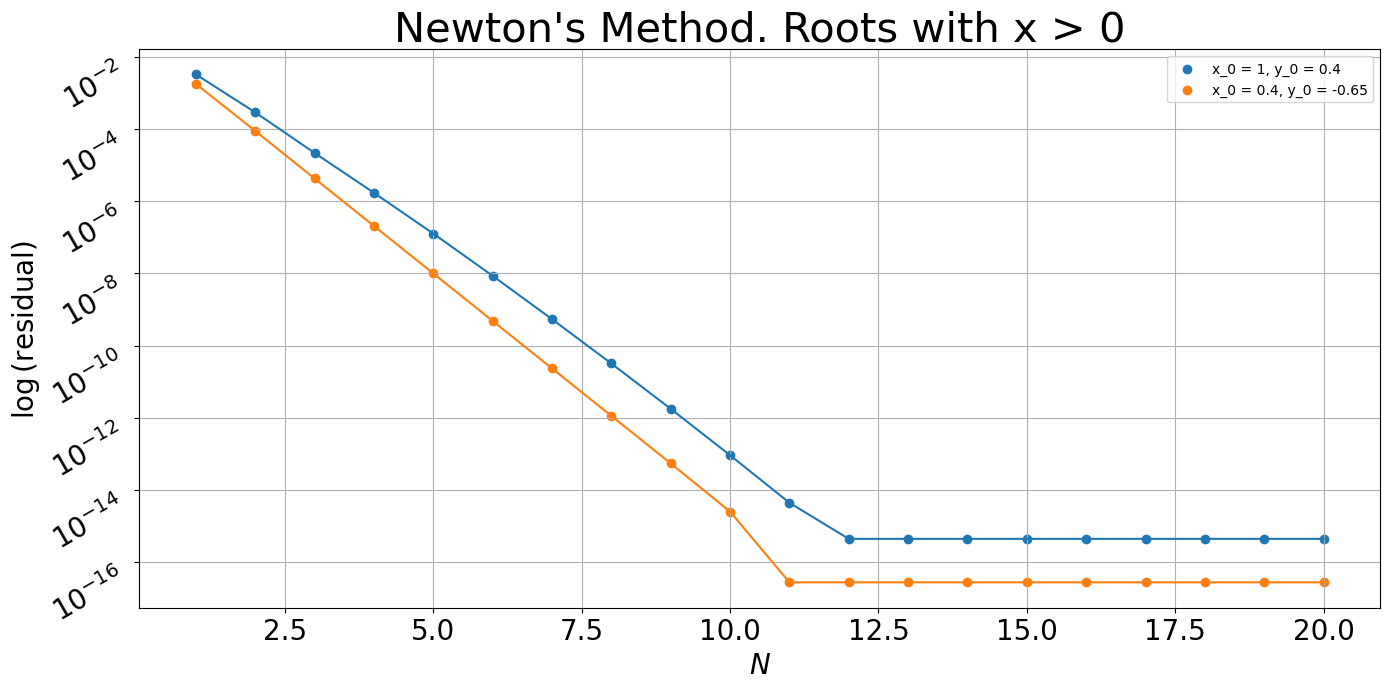

In [114]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Roots with x > 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(1, 0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 1, y_0 = 0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 1, y_0 = 0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(0.4, -0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = 0.4, y_0 = -0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = 0.4, y_0 = -0.65 => root_x: {root_x}, root_y: {root_y}")

Видно, что метод Ньютона работает для обоих корней с $x > 0$. Проверим также, как он справляется с нахождением симметричной пары.

x_0 = -1, y_0 = -0.4 => root_x: -1.0484001411026231, root_y: -0.4126222767141881
x_0 = -0.4, y_0 = 0.65 => root_x: -0.37984844431748094, root_y: 0.6758065905308093


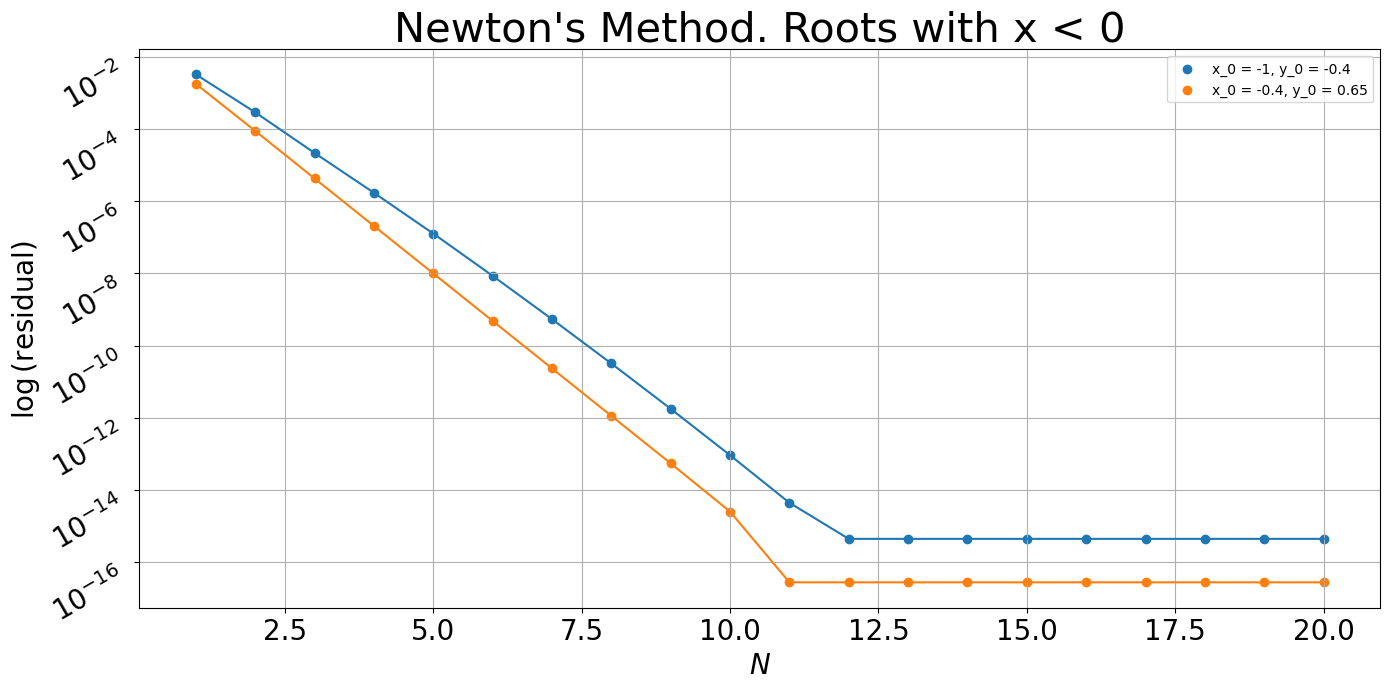

In [117]:
residuals = []
iterations = np.arange(1, 21)

plt.figure(figsize=[14, 7])
plt.title("Newton's Method. Roots with x < 0", fontsize=30)

plt.yscale("log")

plt.xlabel('$N$', fontsize = 20)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(\\text{residual})}$", fontsize = 20)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

plt.grid(which = "both")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(-1, -0.4)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -1, y_0 = -0.4")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -1, y_0 = -0.4 => root_x: {root_x}, root_y: {root_y}")

for i in range(1, iterations.size + 1):
    newton_system = Newton_System(f_xy_1, f_xy_2, i)
    root_x, root_y = newton_system(-0.4, 0.65)
    residuals.append(np.abs(np.tan(root_x * root_y + 0.4) - root_x**2) + np.abs(0.6 * root_x**2 + 2 * root_y**2 - 1))

plt.scatter(iterations, residuals, label="x_0 = -0.4, y_0 = 0.65")
plt.plot(iterations, residuals)
plt.legend(loc = "best")
plt.tight_layout()

residuals.clear()

print(f"x_0 = -0.4, y_0 = 0.65 => root_x: {root_x}, root_y: {root_y}")

Как и ожидалось, с помощью метода Ньютона были найдены все корни.